In [5]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import threading
import os
from IPython.display import clear_output

In [6]:
## Find the starting collaboration year for each author
def get_start_Y(aut):
    YEARS = [str(year) for year in range(1990,2019)]    
    for y in YEARS:
        val = aut[y].values[0]
        if(val != 0):
            return y
        
# add starting publication year to each row of the dataset
def add_start_publication_y(df, pub_df):
    df["start_year"] = [0 for i in range(len(df))]
    i = 0
    for id in df["ID"]:
        
        if(i%500 == 0):
            print("done", i, "on", len(df), end='\r')
        i+=1
        
        aut = df.loc[df["ID"] == id]
        df.loc[df.ID == id, "start_year"] = get_start_Y(pub_df.loc[pub_df["ID"] == id])
    return df

# build a df for each possible starting year
def split_by_y(df):
    splitted = []
    YEARS = [str(year) for year in range(1990,2019)]    
    for y in YEARS:
        tmp_df = df.loc[df.start_year == y]
        tmp_df = tmp_df.drop(columns=[x for i,x in enumerate(YEARS) if int(x)<int(y)] )
        
        splitted.append(tmp_df)
    return splitted

================================================= HOLE SIZE 0 ==================================================


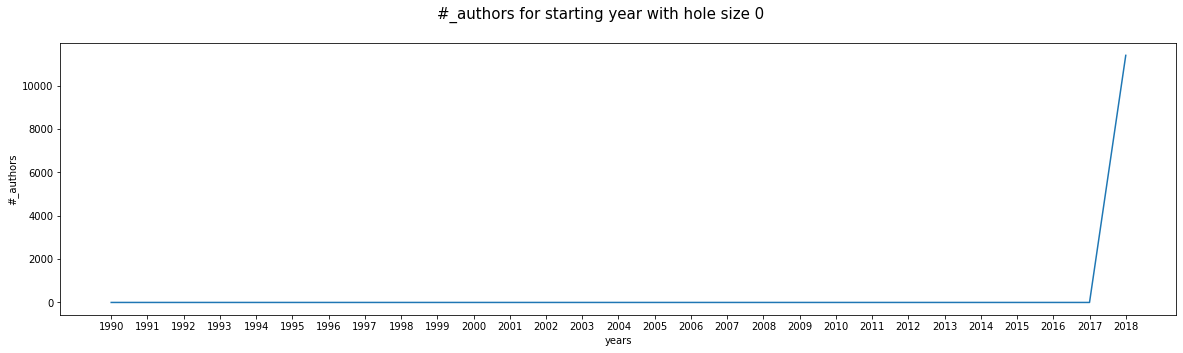

================================================= HOLE SIZE 1 ==================================================


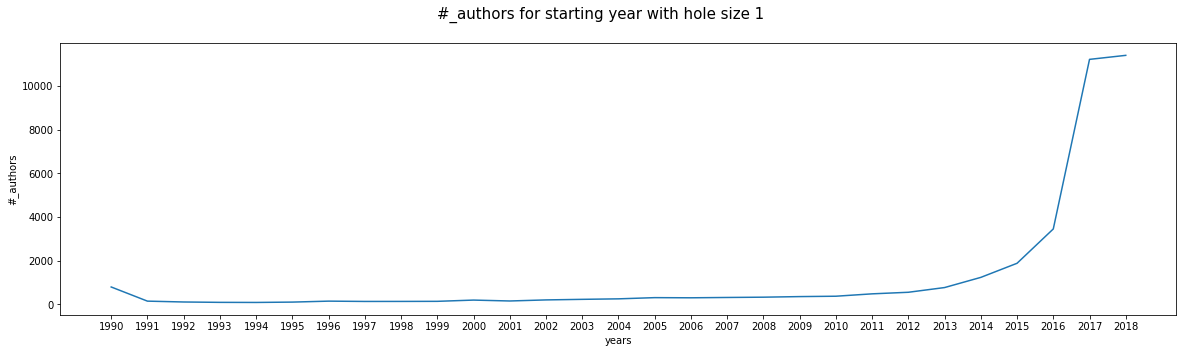

================================================= HOLE SIZE 2 ==================================================


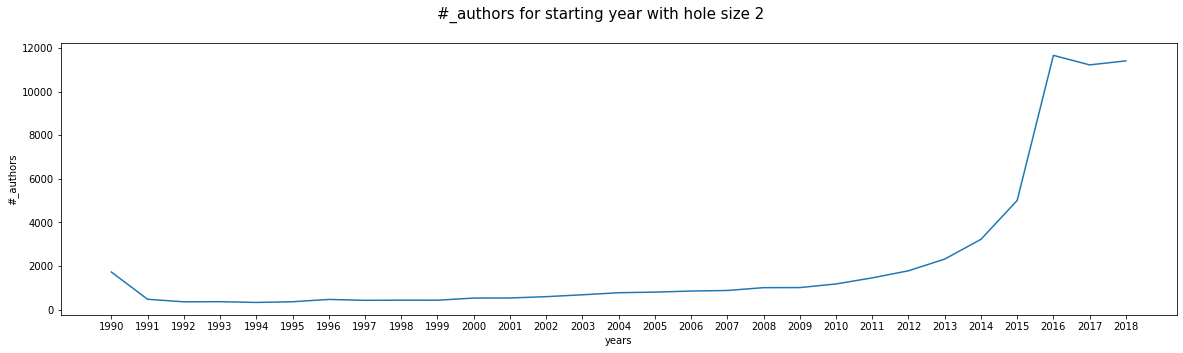

================================================= HOLE SIZE 3 ==================================================


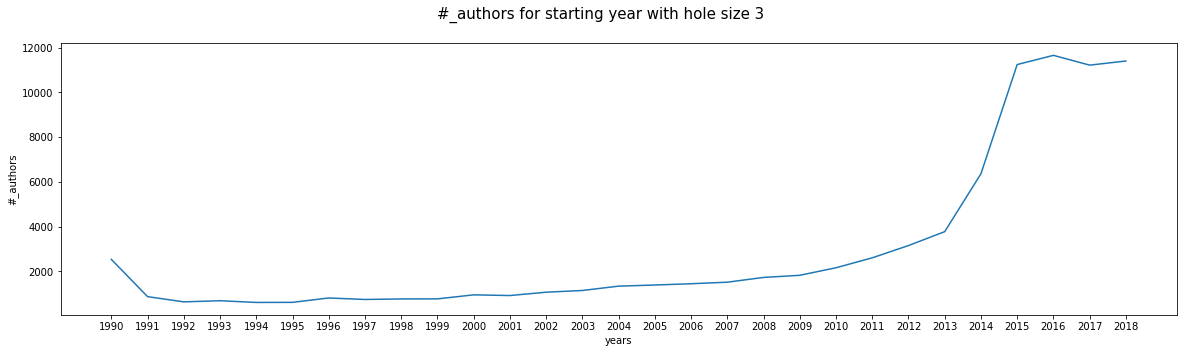

================================================= HOLE SIZE 4 ==================================================


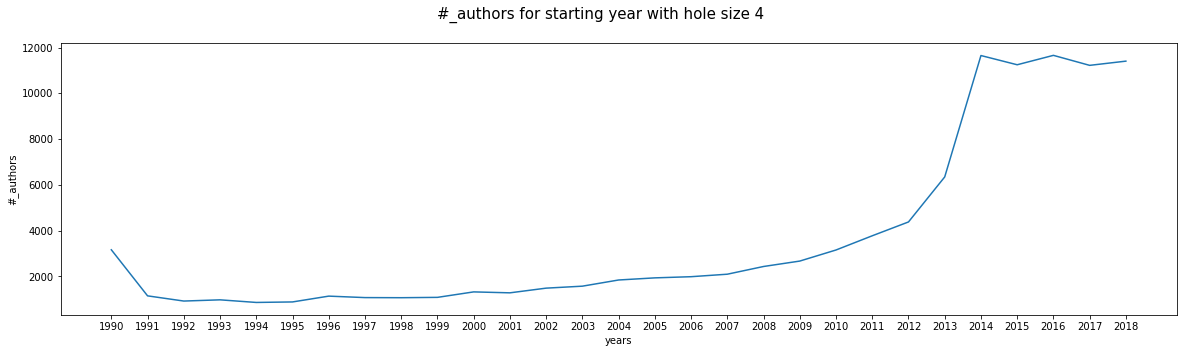

================================================= HOLE SIZE 5 ==================================================


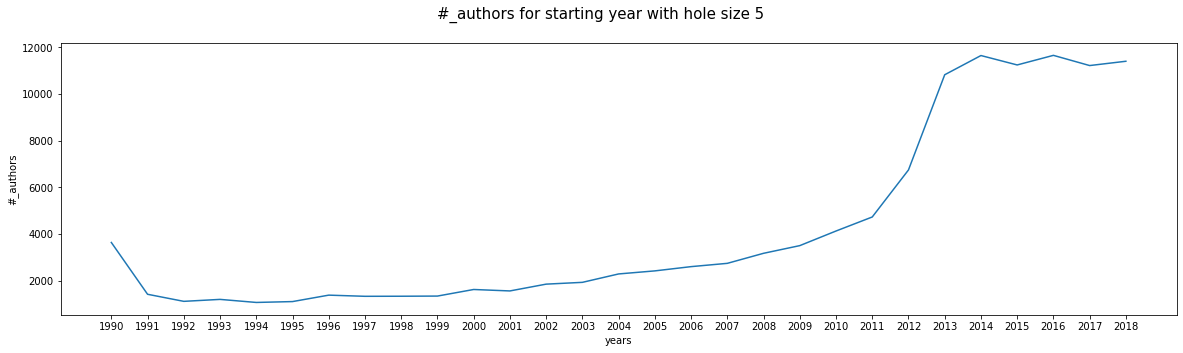

================================================= HOLE SIZE 6 ==================================================


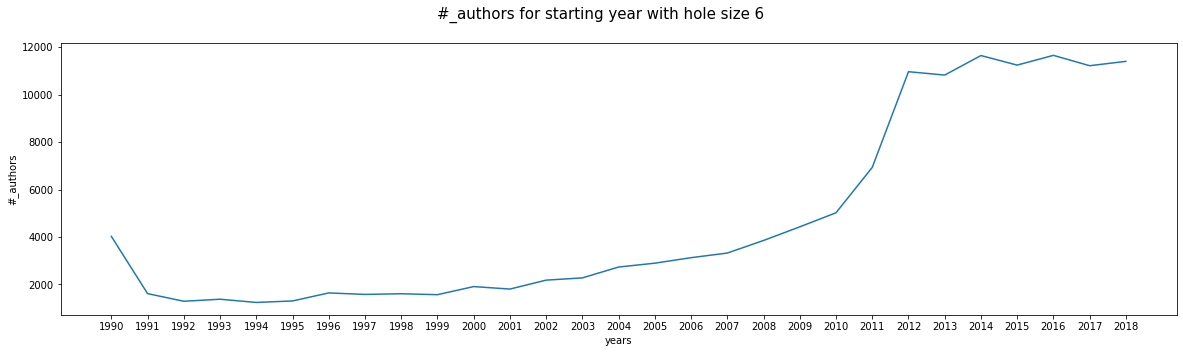

================================================= HOLE SIZE 7 ==================================================


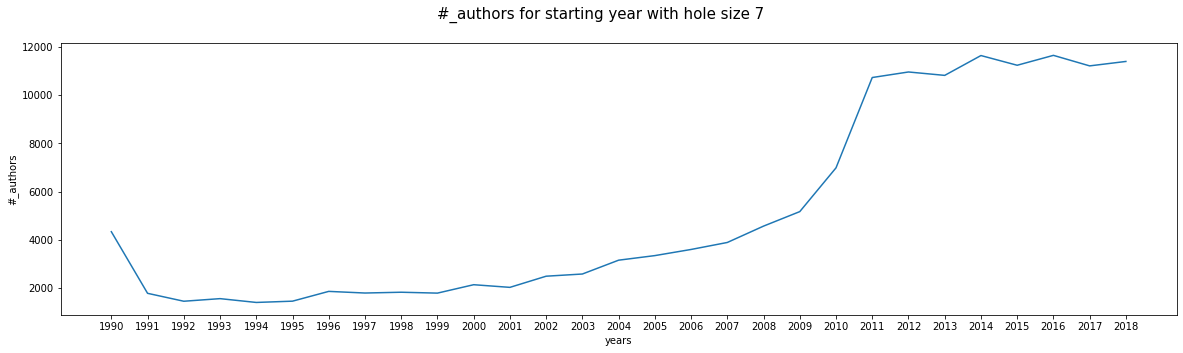

================================================= HOLE SIZE 8 ==================================================


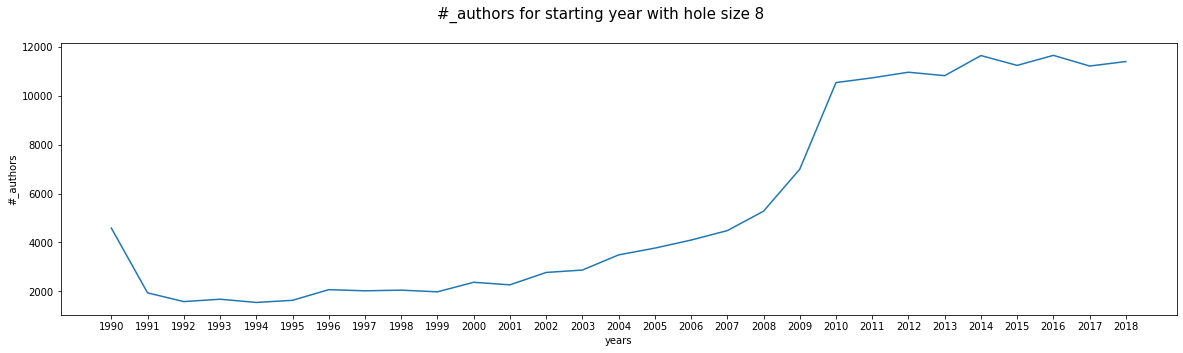

================================================= HOLE SIZE 9 ==================================================


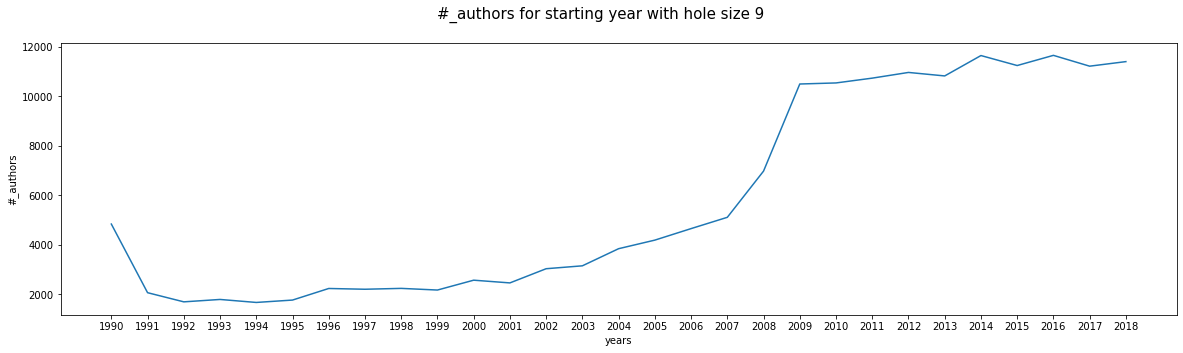

================================================= HOLE SIZE 10 =================================================


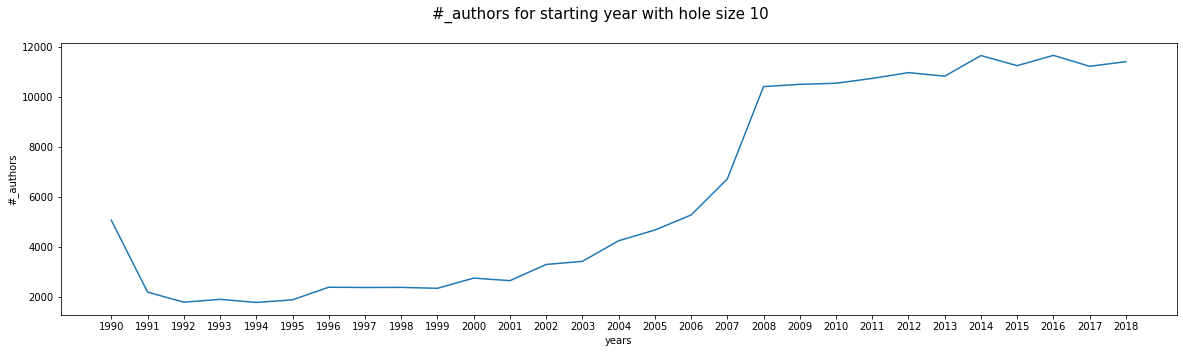

================================================= HOLE SIZE 11 =================================================


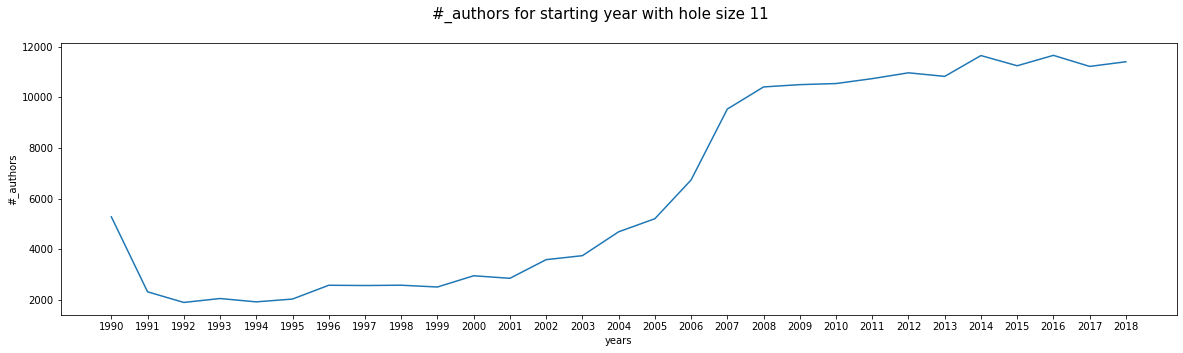

================================================= HOLE SIZE 12 =================================================


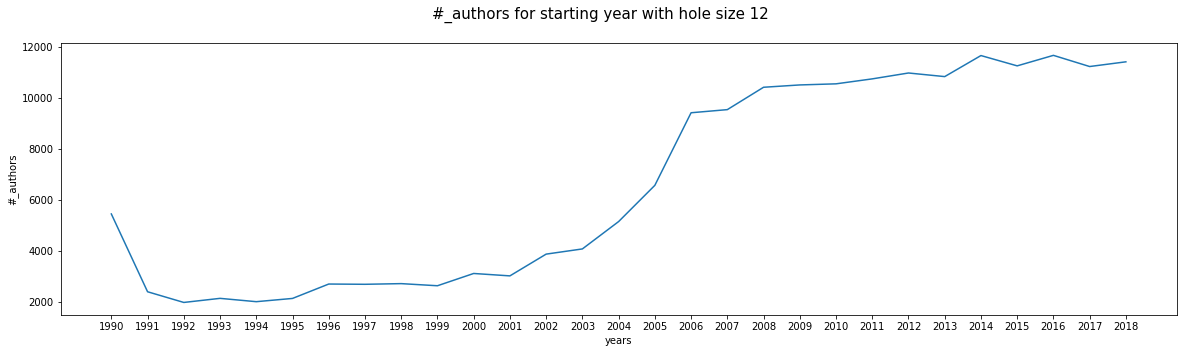

================================================= HOLE SIZE 13 =================================================


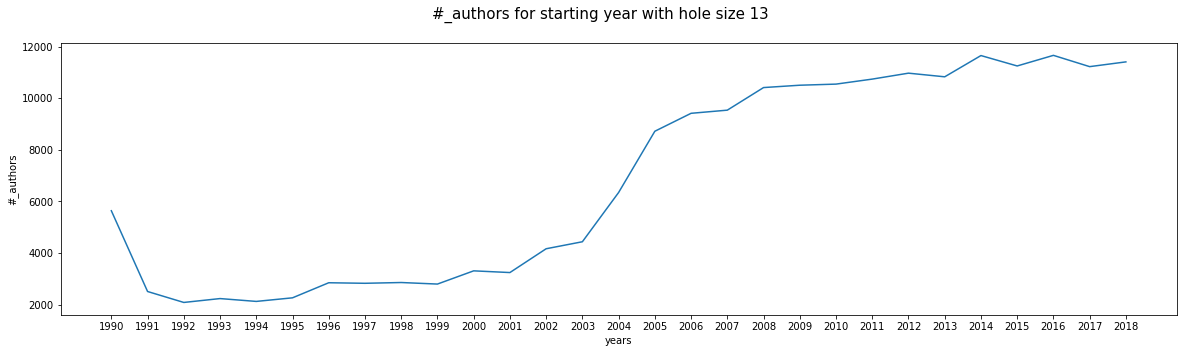

================================================= HOLE SIZE 14 =================================================


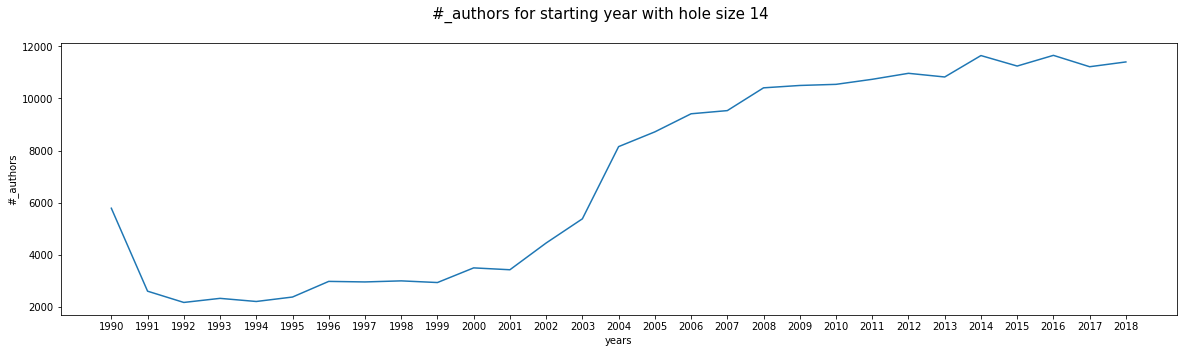

================================================= HOLE SIZE 15 =================================================


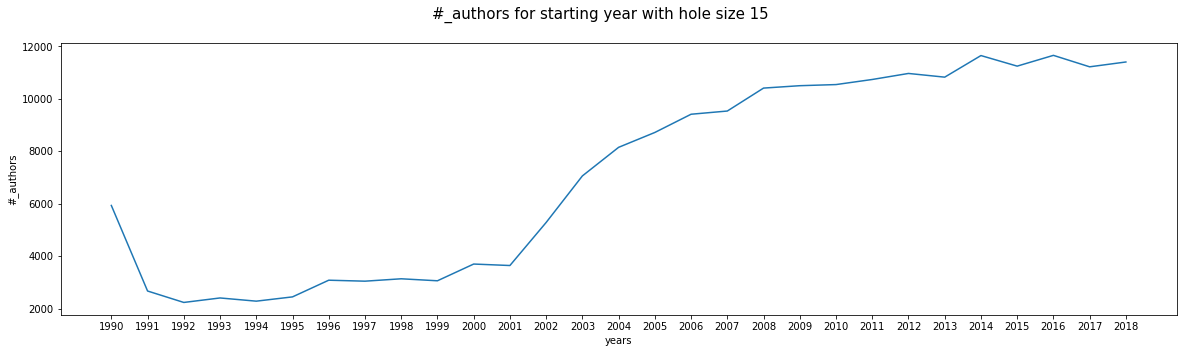

================================================= HOLE SIZE 16 =================================================


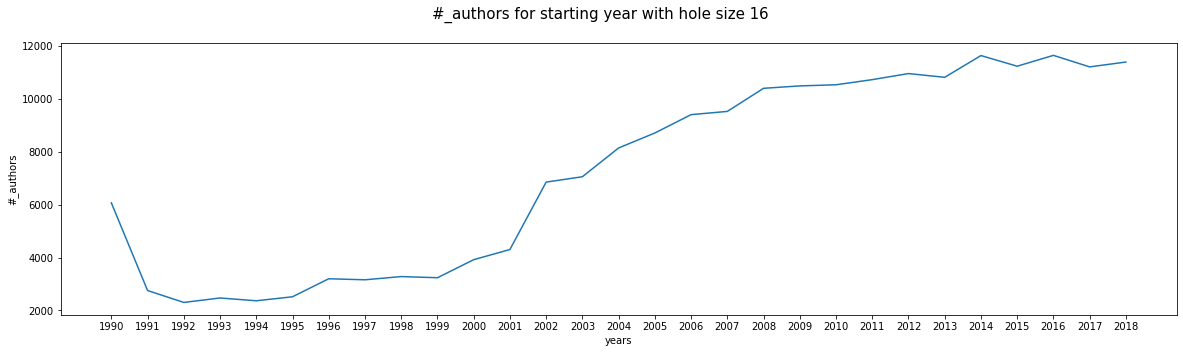

================================================= HOLE SIZE 17 =================================================


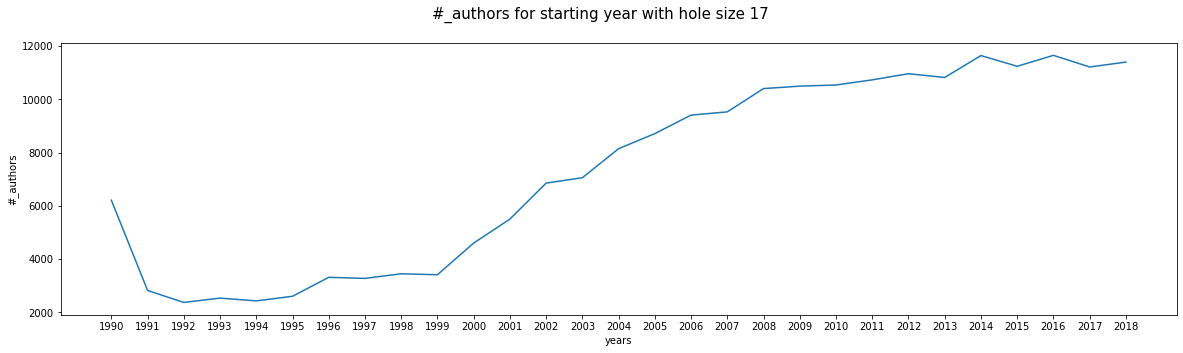

================================================= HOLE SIZE 18 =================================================


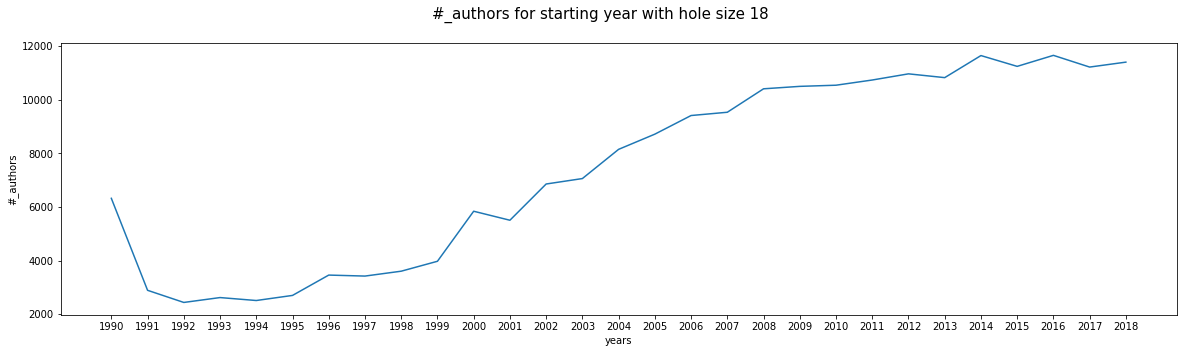

================================================= HOLE SIZE 19 =================================================


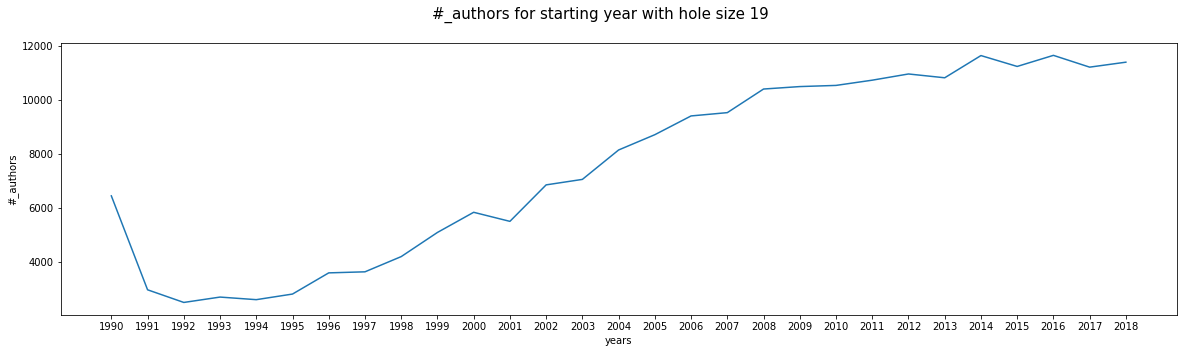

================================================= HOLE SIZE 20 =================================================


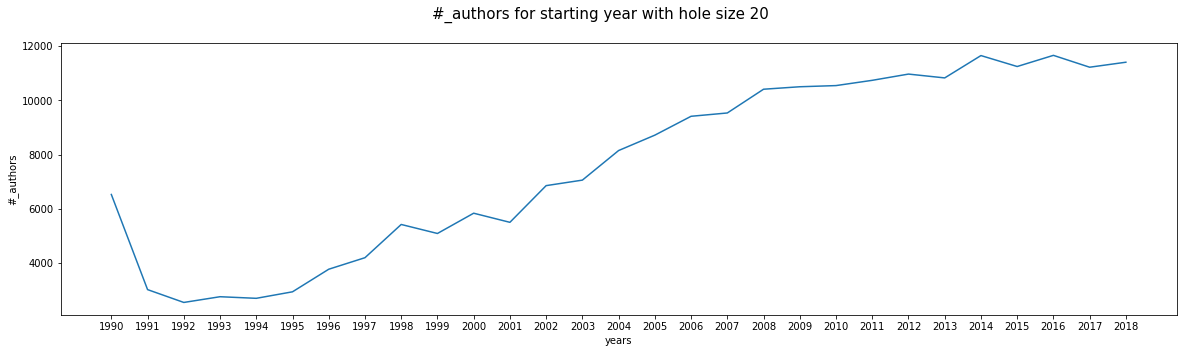

================================================= HOLE SIZE 21 =================================================


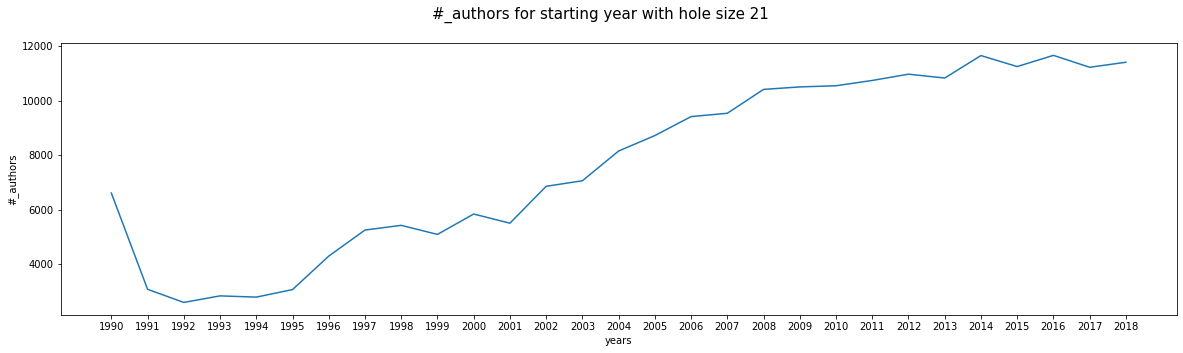

================================================= HOLE SIZE 22 =================================================


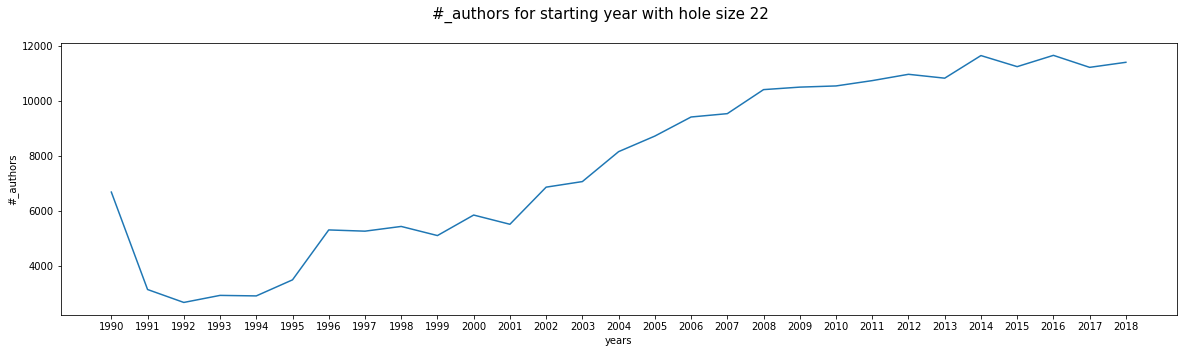

================================================= HOLE SIZE 23 =================================================


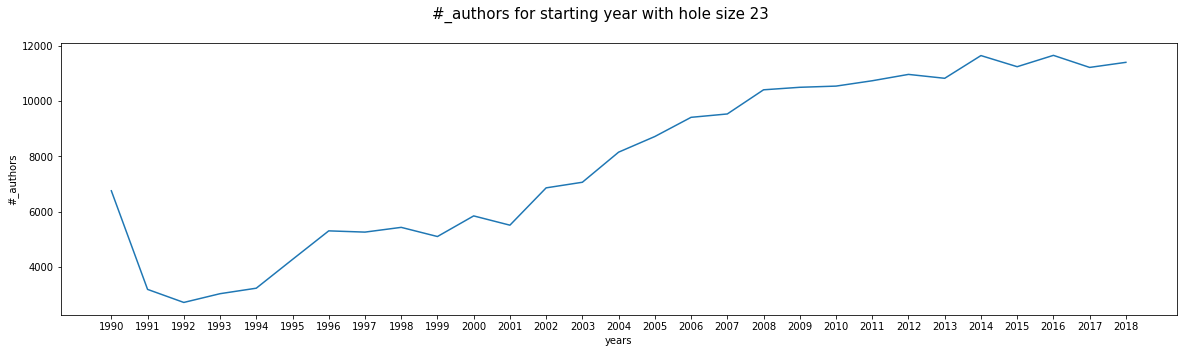

================================================= HOLE SIZE 24 =================================================


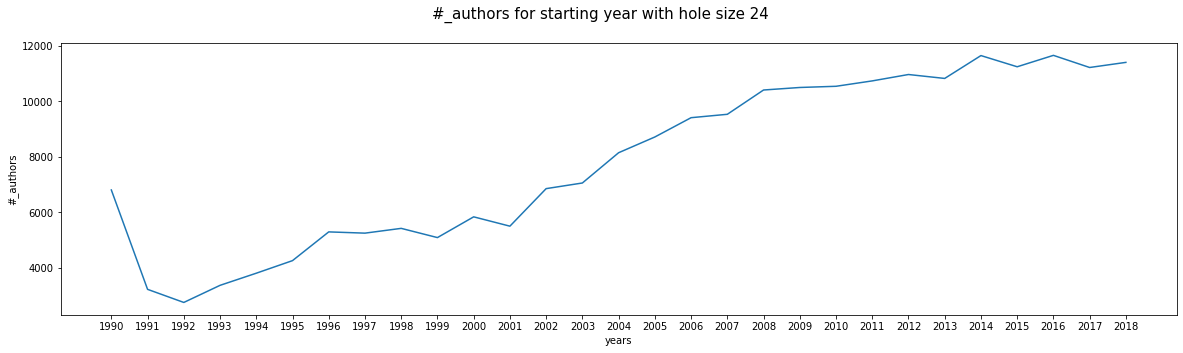

================================================= HOLE SIZE 25 =================================================


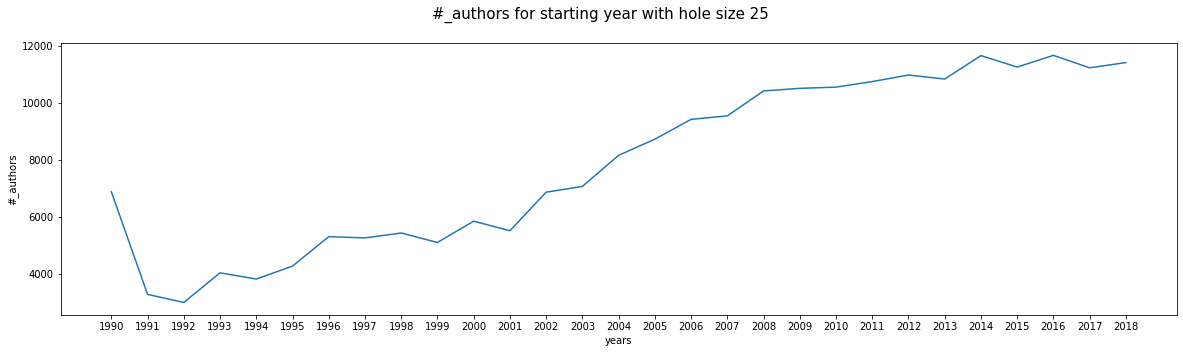

================================================= HOLE SIZE 26 =================================================


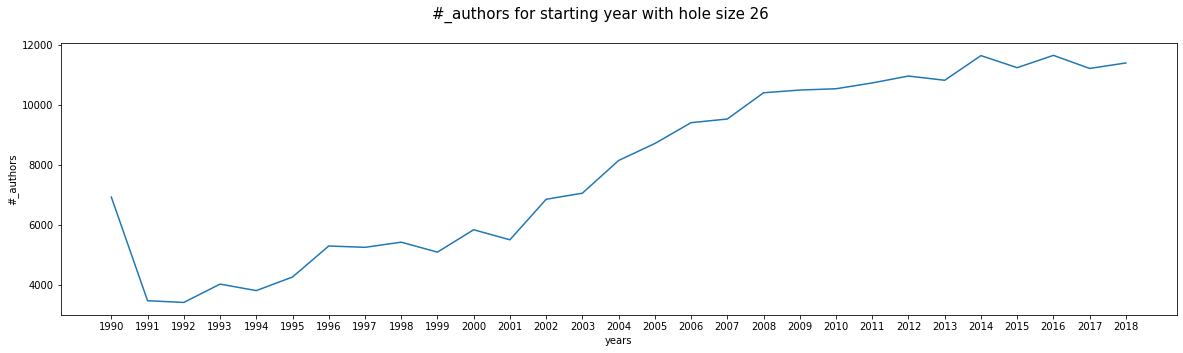

================================================= HOLE SIZE 27 =================================================


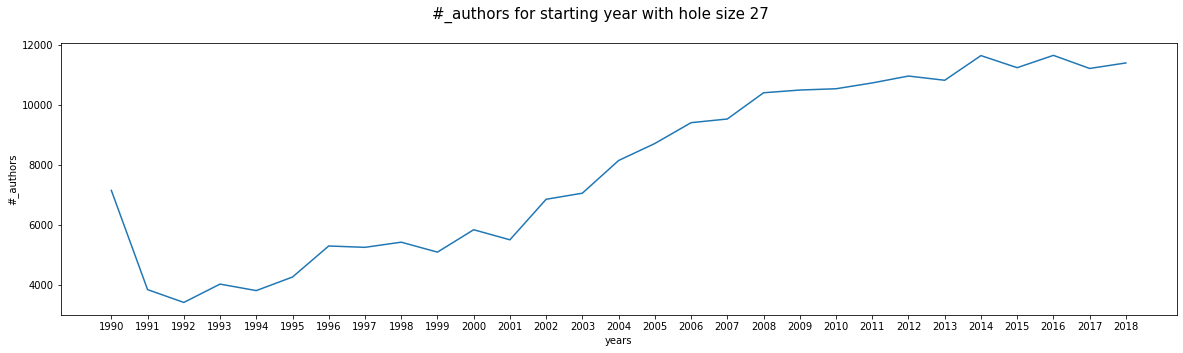

================================================= HOLE SIZE 28 =================================================


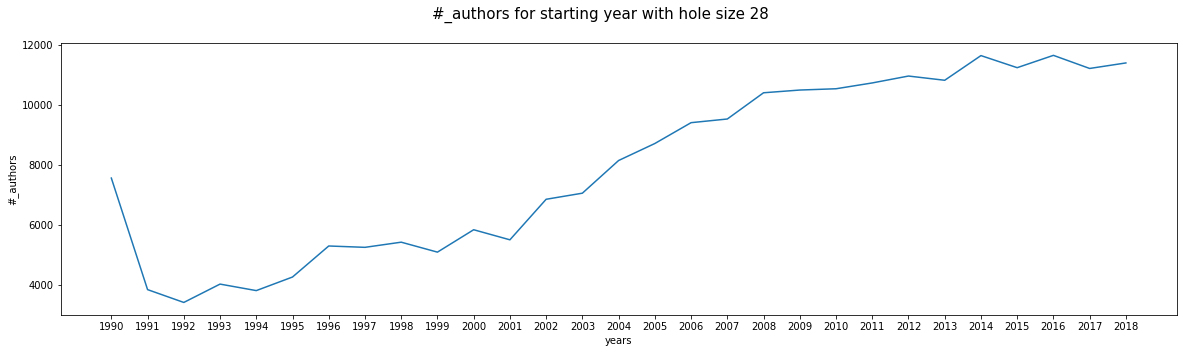

In [70]:
min_size = 0
max_size = 28
YEARS = [str(year) for year in range(1990,2019)]  
publications_df = pd.read_csv('myDATA/02-publication_df.csv')

# Read active authors by hole lenght
for size in range(min_size, max_size+1):
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(120, '='))
    
    if not os.path.exists('myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'):
        os.mkdir('myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted')
    
    path = 'myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(size)+'.csv'
    df = pd.read_csv(path)
    df = add_start_publication_y(df, publications_df)

    # split the df by starting year
    splitted = split_by_y(df)
    
    num_auths = []
    for i in range(len(YEARS)):
        y = YEARS[i]
        file = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted/'+y+'_collabs_by_starting_year.csv'

        # write a .csv for each year Y with all authors that started collaborating in Y.
         # it contains their collaborations form Y until 2018
        df_y = splitted[i]
        df_y = df_y.drop(columns=['start_year'])
        if(len(df_y) > 0):
            df_y.to_csv(file, index=False)
        num_auths.append(len(df_y))
        # print("splitted for hole size " + str(size) + " for year " + y + " -> they are " + str(len(df_y)) )

    fig = plt.figure(figsize=(20, 5))
    fig.suptitle('#_authors for starting year with hole size '+ str(size), fontsize=15)
    plt.plot(YEARS,num_auths)
    plt.xlabel('years')
    plt.ylabel('#_authors')
    fig.savefig('myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted/distribution_chart.png')
    plt.show()